##  set option

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
plt.rc('font', family = 'Malgun Gothic')   # 맑은 고딕체

## 데이터 수집
- 모델별 가격: 네이버에서 제공되는 출고가 가격 직접 추출
- 보조금: 저공해차 통합누리집(공공사이트)에서 추출(서울기준)
- 취등록세: 자동차365(공공사이트)에서 취등록세 계산기를 이용하여 직접추출
- 충전요금: 저공해차 통합누리집(공공사이트)에서 제공되는 2021년 기준 전기요금 및 휘발유값 
- 주행거리: 공공데이터 포털에서 제공하는 서울시 년간 차량 평균 주행거리 csv파일

## 데이터 분석

###       1) 전기차 및 내연기관차 모델별 가격비교

In [6]:
# 모델선정 및 가격은 같은모델의 전기 및 내연기관 모델, 동급의 브랜드, 차종, 옵션을 고려하여 선정
kind_car = pd.read_excel('C:/excel/일대일비교.xlsx')
pd.DataFrame(kind_car) # 전기차 및 내연기관 경제성 각 지표 테이블


,모델명,가격(만원),50000KM 충전요금,보조금,취등록세,5년간 총 유지비
0,bmw i3,6000,220.05,873,280.00,5627.05
1,르노 SM3 ZE,3700,273.85,902,119.00,3190.85
2,기아 레이EV,3500,246.45,0,105.00,3851.45
3,현대 니로EV,4690,232.50,1000,188.30,4110.80
4,기아 쏘울EV,4400,220.05,950,168.00,3838.05
5,현대 아이오닉EV,4300,195.60,991,161.00,3665.60
6,현대 코나ev,4790,220.45,800,195.30,4405.75
7,테슬라 모델3,6000,220.45,950,280.00,5550.45
8,테슬라 모델y,7500,241.60,575,385.00,7551.60
9,쉐보레 볼트ev,3990,228.20,960,139.30,3397.50


In [7]:
ddff = pd.DataFrame(kind_car)
ddff1 = ddff.set_index('모델명')
ddff1
price1 = ddff1.loc[:, ['가격(만원)']] 
price1
price_1 = price1.sort_values(by = '가격(만원)', ascending = False) # 모델별 가격 내림차순
price_1


,가격(만원)
모델명,
테슬라 모델y,7500
bmw i3,6000
테슬라 모델3,6000
bmw x1,5270
현대 코나ev,4790
현대 니로EV,4690
기아 쏘울EV,4400
미니 해치백s,4350
현대 아이오닉EV,4300


In [10]:
# 동급의 전기차와 내연기관차의 출고가를 각각 1대1 비교하기위해 동력으로 구분하여 막대그래프를 시각화
price_car = pd.read_excel('C:/excel/가격비교.xlsx')
price_car

,모델명,가격(만원),동력
0,i3 해치백s,6000,전기
1,i3 해치백s,4350,내연기관
2,sm3ZE sm3,3700,전기
3,sm3ZE sm3,1635,내연기관
4,레이EV 레이,3500,전기
5,레이EV 레이,1480,내연기관
6,니로EV 니로,4690,전기
7,니로EV 니로,2750,내연기관
8,소울EV 소울,4400,전기
9,소울EV 소울,2155,내연기관


### 2) 충전요금 비교

In [11]:
# 동급의 전기차와 내연기관차의 출고가를 각각 1대1 비교하기위해 동력으로 구분하여 막대그래프를 시각화
# 서울시 기준 평균 주행거리는 년간 평균 10982.84K로 편의상 100000KM를 기준으로 년간 충전요금계산 하여 1대1비교 분석
charge_car = pd.read_excel('C:/excel/10000KM.xlsx')
charge_car

# 전기차 배터리 교체주기인 5년을 기준으로 충전요금 계산
# 5년 이용시 충전요금 10000KM 요금의 5배로 계산
charge1_car = pd.read_excel('C:/excel/50000KM.xlsx')
charge1_car

,모델명,50000KM 충전요금(만원),동력
0,i3 해치백s,220.05,전기
1,i3 해치백s,616.65,내연기관
2,sm3ZE sm3,273.85,전기
3,sm3ZE sm3,549.60,내연기관
4,레이EV 레이,246.45,전기
5,레이EV 레이,583.45,내연기관
6,니로EV 니로,232.50,전기
7,니로EV 니로,336.30,내연기관
8,소울EV 소울,220.05,전기
9,소울EV 소울,611.70,내연기관


### 3) 취등록세

In [13]:
ddff1
subsidy = ddff.loc[:, ['모델명','취등록세']] #모델별 취등록세 비교
subsidy1 = subsidy
subsidy1
subsidy2 = subsidy1.sort_values(by = '취등록세', ascending = False)
subsidy2

,모델명,취등록세
8,테슬라 모델y,385.00
18,bmw x1,368.90
10,미니 해치백s,304.50
7,테슬라 모델3,280.00
0,bmw i3,280.00
17,벤츠 A클래스,275.80
6,현대 코나ev,195.30
13,현대 니로,192.50
3,현대 니로EV,188.30
4,기아 쏘울EV,168.00


### 4)최종 경제성 비교

In [14]:
fn_price = pd.read_excel('C:/excel/일대일비교 총합.xlsx')
fn_price

fn_price1 = fn_price.loc[:, ['모델명', '5년간 총 비용', '동력']]
fn_price1

,모델명,5년간 총 비용,동력
0,i3 해치백s,5627.05,전기
1,i3 해치백s,5271.15,내연기관
2,sm3ZE sm3,3190.85,전기
3,sm3ZE sm3,2299.05,내연기관
4,레이EV 레이,3851.45,전기
5,레이EV 레이,2072.65,내연기관
6,니로EV 니로,4110.80,전기
7,니로EV 니로,3278.80,내연기관
8,소울EV 소울,3838.05,전기
9,소울EV 소울,2917.55,내연기관


# 데이터 시각화

<Figure size 1440x720 with 0 Axes>

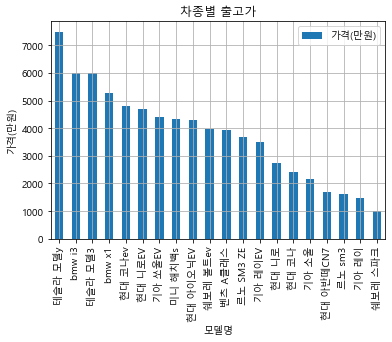

In [17]:
plt.figure(figsize = (20,10))
bar = price_1.plot.bar(grid = True)
bar.set_xlabel('모델명')
bar.set_ylabel('가격(만원)')
bar.set_title('차종별 출고가')

plt.show()

### 1)모델별 가격 비교

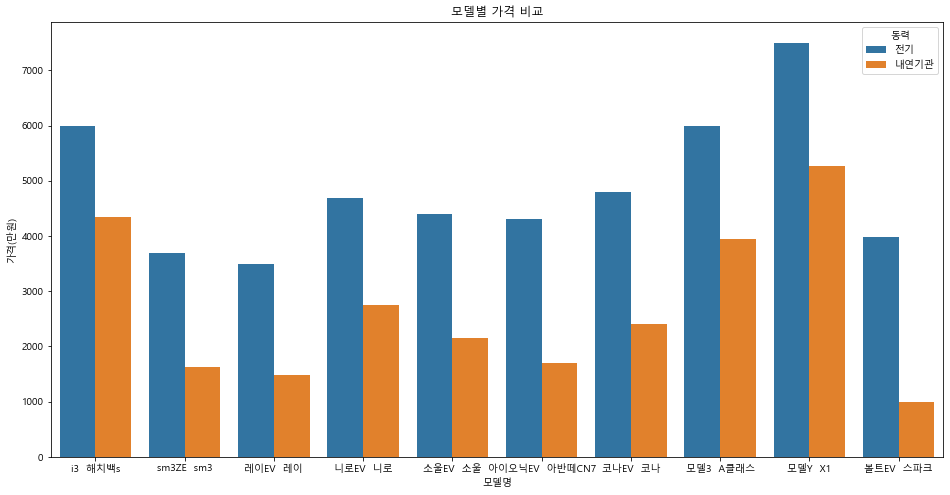

In [18]:
plt.figure(figsize = (16,8))
sns.barplot( x = '모델명',y = '가격(만원)', hue = '동력', data = price_car) # barplot메서드의 hue값을 동력으로 설정하여 비교분석
plt.title('모델별 가격 비교')
plt.show()

### 2) 1년 평균 충전요금 비교

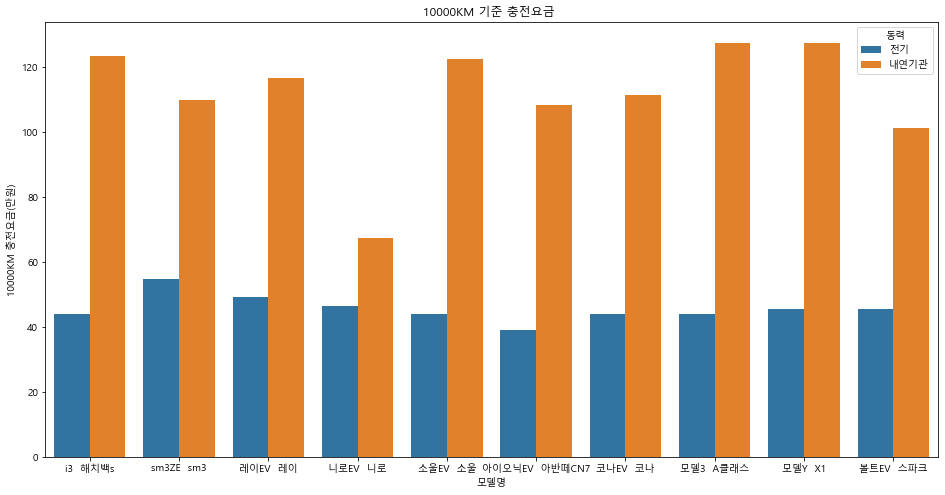

In [19]:
plt.figure(figsize=(16,8))
sns.barplot(x= '모델명', y = '10000KM 충전요금(만원)', hue =  '동력', data = charge_car)
plt.title('10000KM 기준 충전요금 ')
plt.show()

### 3) 5년 평균 충전요금 비교

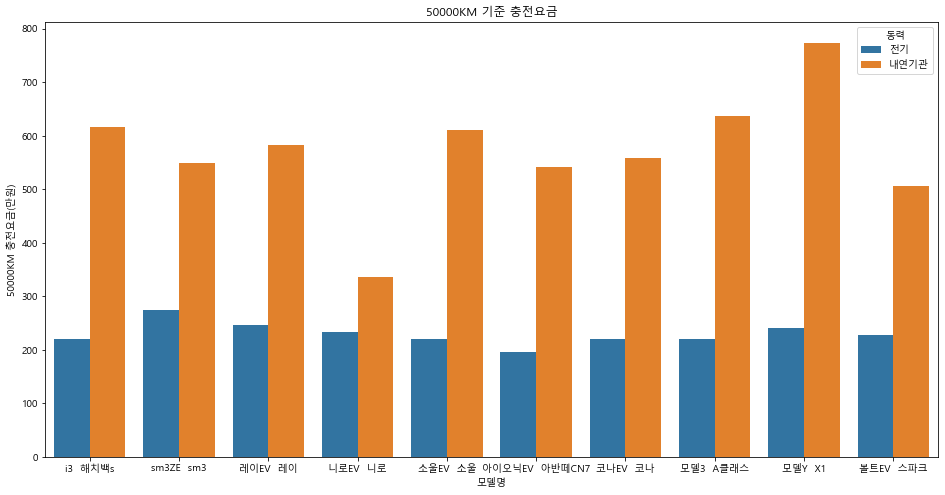

In [20]:
plt.figure(figsize = (16,8))
sns.barplot(x='모델명', y = '50000KM 충전요금(만원)', hue = '동력', data = charge1_car)
plt.title('50000KM 기준 충전요금')
plt.show()

### 4) 차량별 취등록세 비교

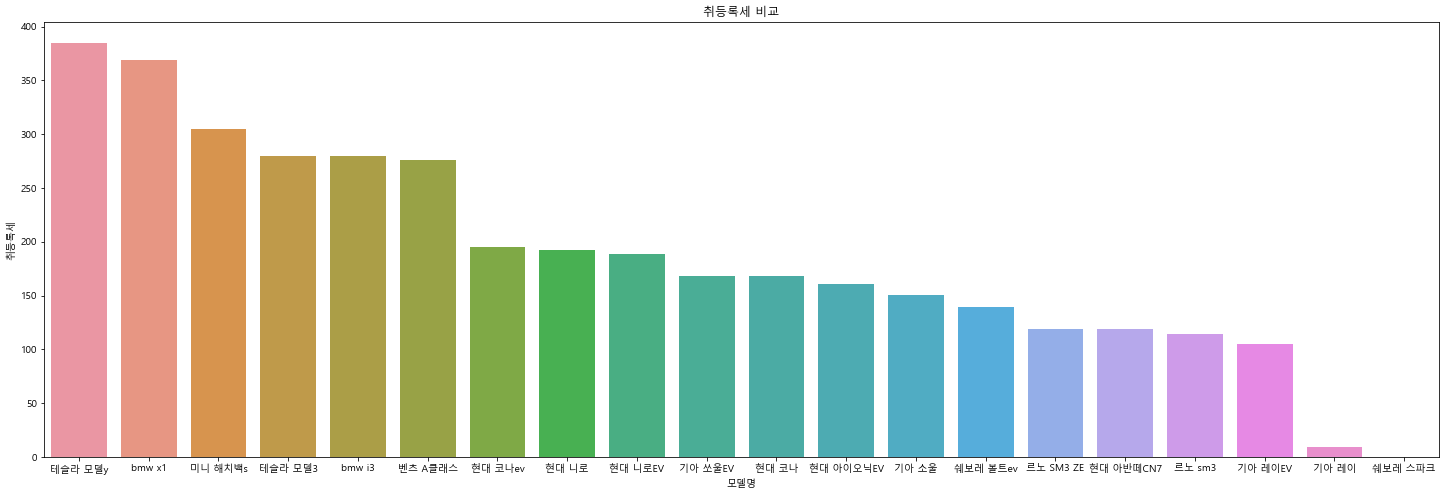

In [21]:
plt.figure(figsize = (25,8))
sns.barplot(x='모델명', y='취등록세', data = subsidy2 )
plt.title('취등록세 비교')

plt.show()

### 5) 5년 기준 경제성 비교

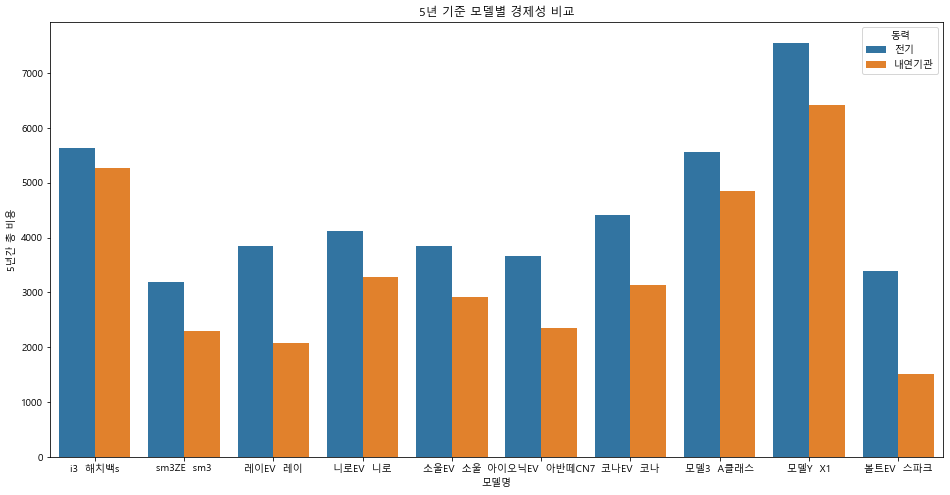

In [22]:
plt.figure(figsize = (16,8))
sns.barplot(x='모델명', y = '5년간 총 비용', hue = '동력', data = fn_price1)
plt.title('5년 기준 모델별 경제성 비교')

plt.show()